<a href="https://colab.research.google.com/github/Rezamoghadam8810/Algorithmic_trading_tutorial/blob/main/Challenge_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use('ggplot')

In [17]:
close = pd.read_csv("/content/close.csv", index_col="Date", parse_dates=["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,108.4067,383.6150,1.2628,1214.6000,39.0886,16804.7109
2014-10-02,107.9719,375.0720,1.2624,1214.2000,38.9694,16801.0508
2014-10-03,109.8762,359.5120,1.2671,1192.2000,39.2504,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,243.7286,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,241.6159,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,241.9745,34529.4492


In [22]:
close.rename(columns={'BTC-USD': 'BTC'}, inplace=True)
btc=close.BTC.dropna().to_frame().copy()
btc.rename(columns={'BTC': 'Price'}, inplace=True)
btc

,Price
Date,
2014-10-01,383.6150
2014-10-02,375.0720
2014-10-03,359.5120
2014-10-04,328.8660
2014-10-05,320.5100
...,...
2021-05-26,39294.1992
2021-05-27,38436.9688
2021-05-28,35697.6055


In [23]:
btc.shift(periods=1)

,Price
Date,
2014-10-01,NaN
2014-10-02,383.6150
2014-10-03,375.0720
2014-10-04,359.5120
2014-10-05,328.8660
...,...
2021-05-26,38402.2227
2021-05-27,39294.1992
2021-05-28,38436.9688


In [24]:
btc["P_lag1"]=btc.shift(periods=1)
btc

,Price,P_lag1
Date,,
2014-10-01,383.6150,NaN
2014-10-02,375.0720,383.6150
2014-10-03,359.5120,375.0720
2014-10-04,328.8660,359.5120
2014-10-05,320.5100,328.8660
...,...,...
2021-05-26,39294.1992,38402.2227
2021-05-27,38436.9688,39294.1992
2021-05-28,35697.6055,38436.9688


In [26]:
btc["P_diff"]=btc.Price.sub(btc.P_lag1)
btc

,Price,P_lag1,P_diff
Date,,,
2014-10-01,383.6150,NaN,NaN
2014-10-02,375.0720,383.6150,-8.5430
2014-10-03,359.5120,375.0720,-15.5600
2014-10-04,328.8660,359.5120,-30.6460
2014-10-05,320.5100,328.8660,-8.3560
...,...,...,...
2021-05-26,39294.1992,38402.2227,891.9766
2021-05-27,38436.9688,39294.1992,-857.2305
2021-05-28,35697.6055,38436.9688,-2739.3633


In [27]:
btc["P_diff2"]=btc.Price.diff(periods=1)
btc

,Price,P_lag1,P_diff,P_diff2
Date,,,,
2014-10-01,383.6150,NaN,NaN,NaN
2014-10-02,375.0720,383.6150,-8.5430,-8.5430
2014-10-03,359.5120,375.0720,-15.5600,-15.5600
2014-10-04,328.8660,359.5120,-30.6460,-30.6460
2014-10-05,320.5100,328.8660,-8.3560,-8.3560
...,...,...,...,...
2021-05-26,39294.1992,38402.2227,891.9766,891.9766
2021-05-27,38436.9688,39294.1992,-857.2305,-857.2305
2021-05-28,35697.6055,38436.9688,-2739.3633,-2739.3633


In [28]:
btc.P_diff.equals(btc.P_diff2)

True

In [29]:
btc.Price.div(btc.P_lag1)-1

,0
Date,
2014-10-01,NaN
2014-10-02,-0.0223
2014-10-03,-0.0415
2014-10-04,-0.0852
2014-10-05,-0.0254
...,...
2021-05-26,0.0232
2021-05-27,-0.0218
2021-05-28,-0.0713


In [30]:
btc["Returns"]=btc.Price.pct_change(periods=1)
btc

,Price,P_lag1,P_diff,P_diff2,Returns
Date,,,,,
2014-10-01,383.6150,NaN,NaN,NaN,NaN
2014-10-02,375.0720,383.6150,-8.5430,-8.5430,-0.0223
2014-10-03,359.5120,375.0720,-15.5600,-15.5600,-0.0415
2014-10-04,328.8660,359.5120,-30.6460,-30.6460,-0.0852
2014-10-05,320.5100,328.8660,-8.3560,-8.3560,-0.0254
...,...,...,...,...,...
2021-05-26,39294.1992,38402.2227,891.9766,891.9766,0.0232
2021-05-27,38436.9688,39294.1992,-857.2305,-857.2305,-0.0218
2021-05-28,35697.6055,38436.9688,-2739.3633,-2739.3633,-0.0713


In [31]:
btc.drop(columns=["P_lag1", "P_diff","P_diff2"], inplace=True)

In [32]:
btc.to_csv("btc.csv")

In [33]:
btc=pd.read_csv("/content/btc.csv",index_col="Date",parse_dates=["Date"])
btc

,Price,Returns
Date,,
2014-10-01,383.6150,NaN
2014-10-02,375.0720,-0.0223
2014-10-03,359.5120,-0.0415
2014-10-04,328.8660,-0.0852
2014-10-05,320.5100,-0.0254
...,...,...
2021-05-26,39294.1992,0.0232
2021-05-27,38436.9688,-0.0218
2021-05-28,35697.6055,-0.0713


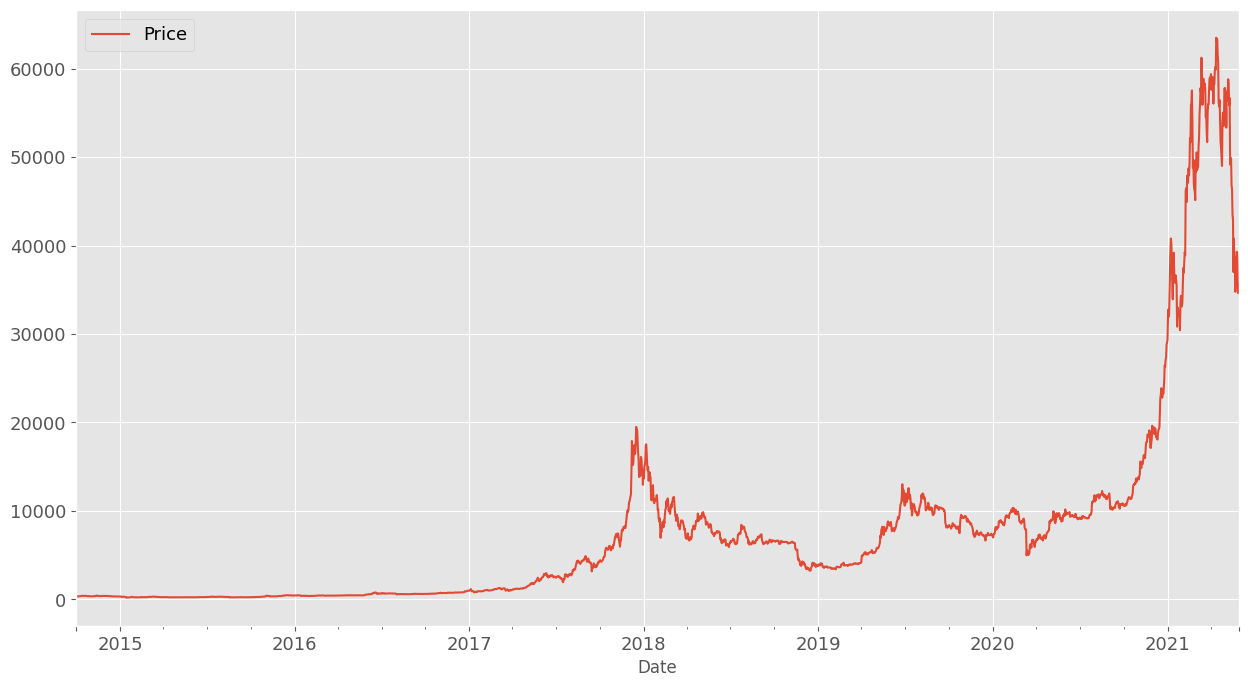

In [34]:
btc.Price.plot(figsize=(15,8),fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [35]:
btc.describe()

,Price,Returns
count,2434.0000,2433.0000
mean,7613.8314,0.0026
std,11611.1824,0.0391
min,178.1030,-0.3717
25%,534.6280,-0.0122
50%,4368.3750,0.0020
75%,9205.5750,0.0180
max,63503.4570,0.2525


In [36]:
mu=btc.Returns.mean()
mu

0.0026377566963340336

In [37]:
sigma=btc.Returns.std()
sigma

0.0391205248062926

In [38]:
np.sqrt(btc.Returns.var())

0.0391205248062926